In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
file_path = r"C:\Users\Asus\data\spotify-2023.csv"
df = pd.read_csv(file_path, encoding='latin-1')

In [68]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [69]:
df.shape

(953, 24)

In [70]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [71]:
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [72]:
df.in_shazam_charts.loc[:5]

0    826
1    382
2    949
3    548
4    425
5    946
Name: in_shazam_charts, dtype: object

In [73]:
df.key.loc[:5]

0     B
1    C#
2     F
3     A
4     A
5    C#
Name: key, dtype: object

In [74]:
#замінимо значення на в цих сповпцях на середнє значення та найбільш популярні 

df.fillna(df.mean(), inplace=True)
df['key'] = df['key'].fillna(df['key'].mode()[0])
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(df['in_shazam_charts'].mode()[0])
df.isna().sum()

C:\Users\Asus\AppData\Local\Temp\ipykernel_22600\2554318496.py:3: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [75]:
#задамо один стиль для графіків 

sns.set(style = "whitegrid",
    rc    = {'figure.figsize':(10,6)},
    palette = "pastel"
)

1. Завдання полягає в тому, щоб побудувати горизонтальну стовпчикову діаграму, на якій відображаються 10 найпопулярніших пісень на Spotify у 2023 році за кількістю прослуховувань. 

In [76]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

In [77]:
top_10_spotify = df.sort_values(by='streams', ascending=False).head(10)

In [78]:
top_10_spotify

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,D,Major,76,91,50,54,0,7,5
162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2.713922e+09,433,...,104,C#,Major,77,36,63,1,0,36,5
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2.665344e+09,492,...,170,C#,Major,59,48,76,4,0,10,5
140,Believer,Imagine Dragons,1,2017,1,31,18986,23,2.594040e+09,250,...,125,A#,Minor,77,74,78,4,0,23,11
725,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2.591224e+09,315,...,95,G#,Major,75,64,52,41,0,11,3
48,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2.565530e+09,281,...,186,G,Major,68,49,59,16,0,13,28


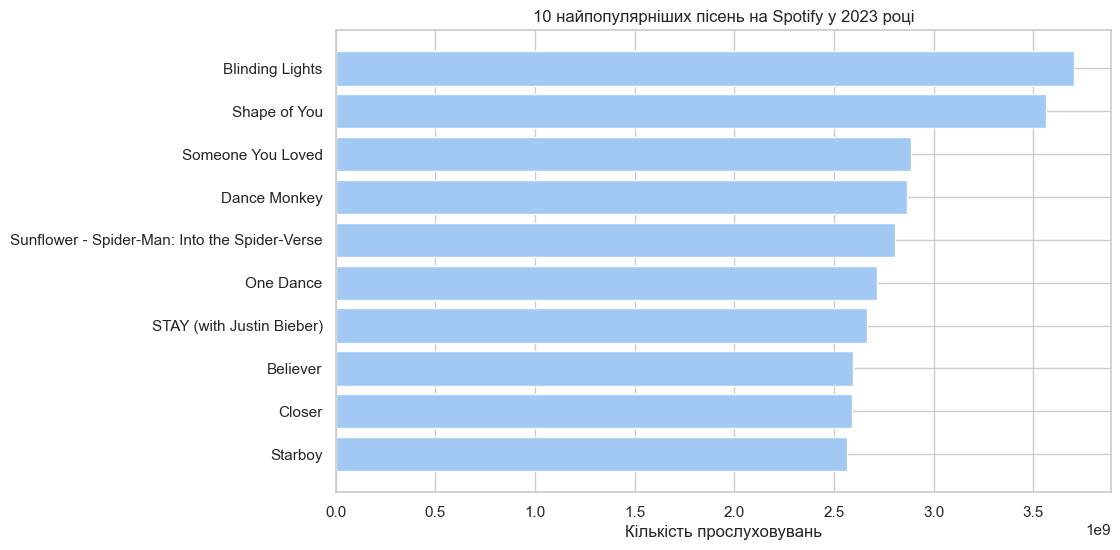

In [79]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_spotify['track_name'], top_10_spotify['streams'])
plt.xlabel('Кількість прослуховувань')
plt.title('10 найпопулярніших пісень на Spotify у 2023 році')
plt.gca().invert_yaxis()  # Щоб найпопулярніші пісні були зверху
plt.show();

2. Розподіл жанрів найпопулярніших пісень: Створіть кругову діаграму або секторну діаграму, яка відображає розподіл жанрів серед найпопулярніших пісень у 2023 році. 

In [80]:
top_10_spotify

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,D,Major,76,91,50,54,0,7,5
162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2.713922e+09,433,...,104,C#,Major,77,36,63,1,0,36,5
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2.665344e+09,492,...,170,C#,Major,59,48,76,4,0,10,5
140,Believer,Imagine Dragons,1,2017,1,31,18986,23,2.594040e+09,250,...,125,A#,Minor,77,74,78,4,0,23,11
725,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2.591224e+09,315,...,95,G#,Major,75,64,52,41,0,11,3
48,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2.565530e+09,281,...,186,G,Major,68,49,59,16,0,13,28


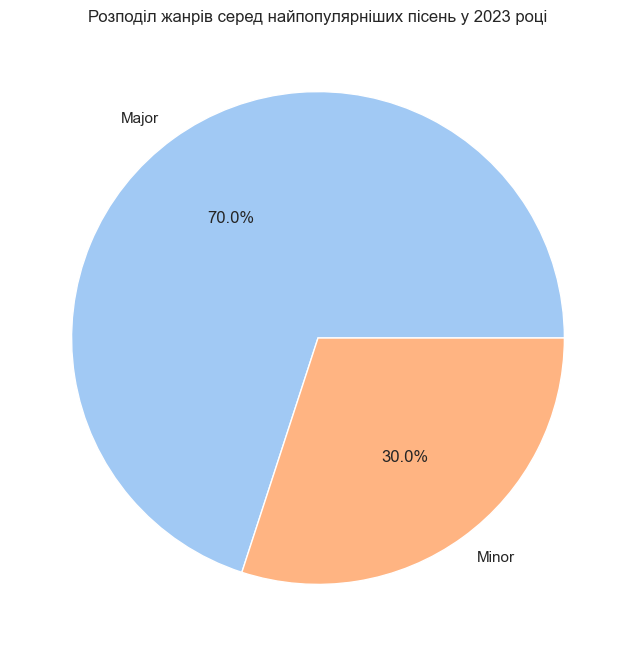

In [81]:
#у нашому датасеті немає колонки яка б вказувала жанр пісні, тому викиристаємо лад пісні 
#mode: Mode of the song (major or minor)

genre_distribution = top_10_spotify['mode'].value_counts()

# Побудова кругової діаграми
plt.figure(figsize=(8, 8))
plt.pie(genre_distribution, labels=genre_distribution.index,  autopct='%1.1f%%')
plt.title('Розподіл жанрів серед найпопулярніших пісень у 2023 році')
plt.show();

3. Динаміка популярності треку в залежності від часу: Побудуйте лінійний графік, який відображає зміни кількості прослуховувань певного треку протягом року 2023 року. 

у нас немає інформації про кількість прослуховавань протягом року, щоб відобразити її зміни, ми маємо лише одне значення streams для пісні, тобто загальну кількість прослуховувань для пісні за 2023 рік

In [82]:
#обираємо "певний трек"
track_name = 'Cruel Summer'
selected_track = df[df['track_name'] == track_name]
selected_track

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15


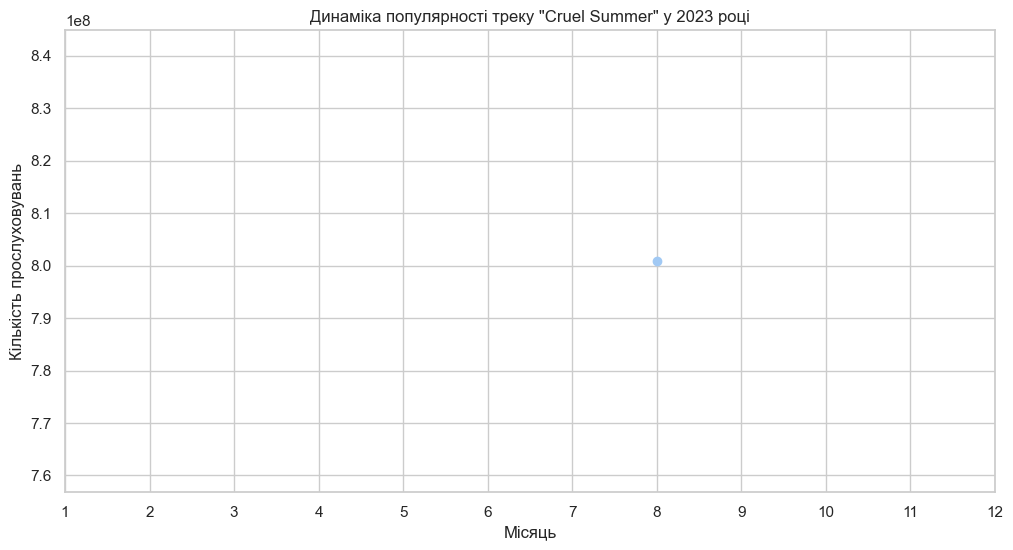

In [83]:
# візьмемо'released_month' (або інший, який містить час)
# дані в 'released_month' представлені як числа (наприклад, 1, 2, ..., 12)

plt.figure(figsize=(12, 6))
plt.plot(selected_track['released_month'], selected_track['streams'], marker='o', linestyle='-', color='b')
plt.title(f'Динаміка популярності треку "{track_name}" у 2023 році')
plt.xlabel('Місяць')
plt.ylabel('Кількість прослуховувань')
plt.xticks(range(1, 13))  # Якщо 'released_month' представлено як числа місяців
plt.grid(True)
plt.show()


Можемо переглянути який місяць є найпопулярніший для релізу у 2023 році

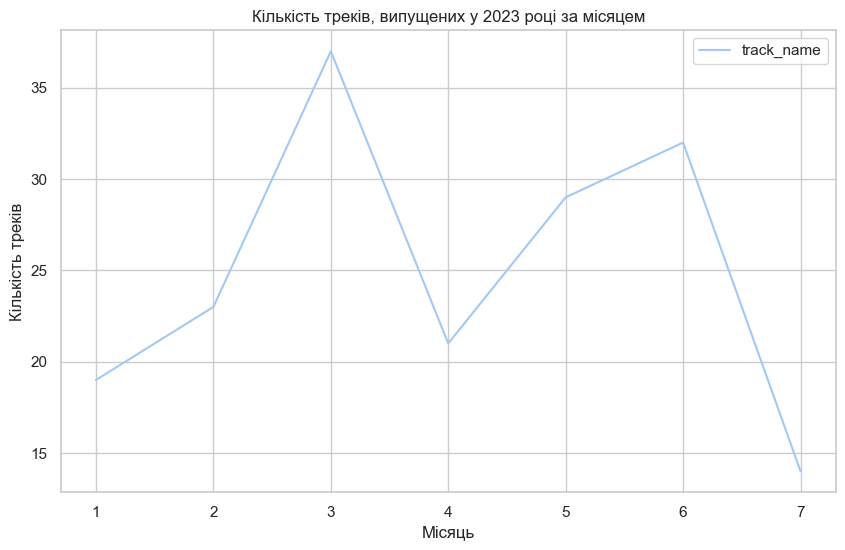

Березень є найпопулярнішим місяцем для релізу у 2023 році


In [111]:
monthly_track_counts = df.query('released_year == 2023')\
.groupby('released_month')\
.agg({'track_name': 'count'})

ax = monthly_track_counts.plot()

ax.set_title('Кількість треків, випущених у 2023 році за місяцем')
ax.set_xlabel('Місяць')
ax.set_ylabel('Кількість треків')
plt.show();

print('Березень є найпопулярнішим місяцем для релізу у 2023 році')

4. Рейтинг артистів на Spotify: Створіть стовпчикову діаграму, на якій відображаються 10 найпопулярніших артистів на Spotify у 2023 році за кількістю слухачів. 

У нас немає даних про кількість слухачів пісні, тому візьмемо нашу колонку streams

In [105]:
#скористаємось уже стовореним датафреймом з найпопулярнішими піснями
top_10_spotify 

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,D,Major,76,91,50,54,0,7,5
162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2.713922e+09,433,...,104,C#,Major,77,36,63,1,0,36,5
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2.665344e+09,492,...,170,C#,Major,59,48,76,4,0,10,5
140,Believer,Imagine Dragons,1,2017,1,31,18986,23,2.594040e+09,250,...,125,A#,Minor,77,74,78,4,0,23,11
725,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2.591224e+09,315,...,95,G#,Major,75,64,52,41,0,11,3
48,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2.565530e+09,281,...,186,G,Major,68,49,59,16,0,13,28


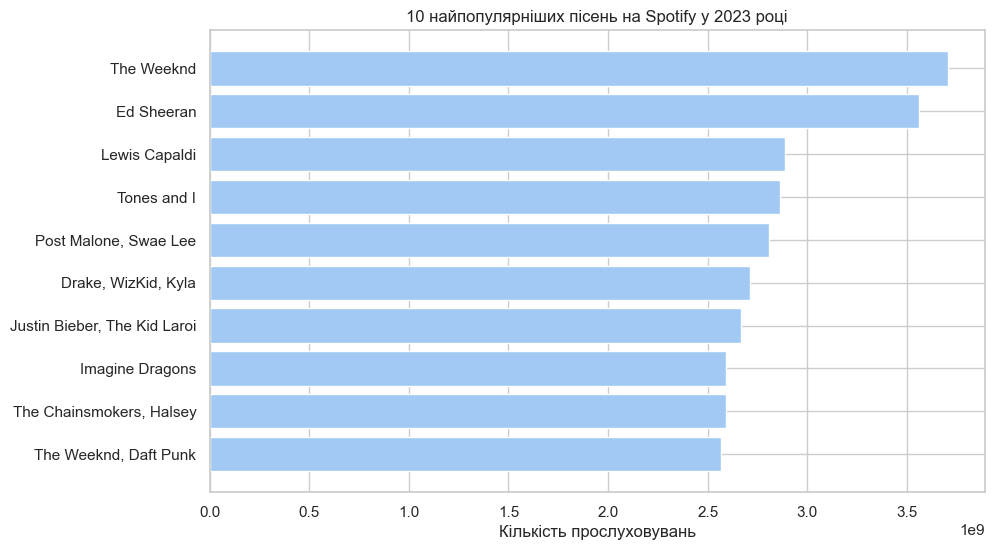

In [106]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_spotify['artist(s)_name'], top_10_spotify['streams'])
plt.xlabel('Кількість прослуховувань')
plt.title('10 найпопулярніших пісень на Spotify у 2023 році')
plt.gca().invert_yaxis()  # Щоб найпопулярніші виконавці були зверху
plt.show();

Ми можемо поєднати графік з найпопулярнішими виконавцями та назвами пісень (з першого завдання), зробивши його інтерактивним за допомогою plotly. Тепер наводячи на графік певної пісні ми бачимо її виконавця та кількість прослуховувань

In [107]:
import plotly.express as px

fig1 = px.bar(top_10_spotify, x='track_name', y='streams',
              title='10 найпопулярніших пісень на Spotify у 2023 році',
              color='track_name',
              color_continuous_scale = 'viridis',
             hover_name = 'artist(s)_name')

fig1.update_xaxes(categoryorder='total descending')
fig1.update_xaxes(title_text='Назва пісні')
fig1.update_yaxes(title_text='Кількість прослуховувань')

fig1.update_layout(width=1000, height=800)

plt.tight_layout()
fig1.show();

<Figure size 1000x600 with 0 Axes>

5. Порівняння популярності трьох треків: Побудуйте горизонтальну стовпчикову діаграму, яка порівнює кількість прослуховувань трьох конкретних треків у 2023 році. 

Оберемо три найпопулярніші треки за 2023

In [108]:
top_3_spotify = df.sort_values(by='streams', ascending=False).head(3)
top_3_spotify

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,Major,50,45,41,75,0,11,3


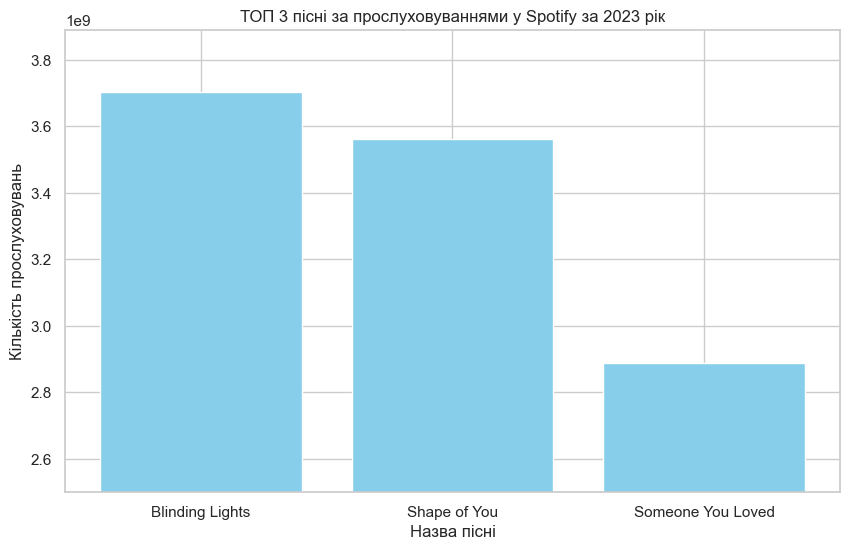

In [109]:
plt.figure(figsize=(10, 6))
plt.bar(top_3_spotify['track_name'], top_3_spotify['streams'], color='skyblue')
plt.ylim(2.5e9) 
plt.title('ТОП 3 пісні за прослуховуваннями у Spotify за 2023 рік')
plt.xlabel('Назва пісні')
plt.ylabel('Кількість прослуховувань')
plt.show();

**Завдання з лекції**

у ноутбках прикріплених до лекцій не знайшла дописані три завдання для візуалізацій (на 06.10)